# Introduction to Scikit-Learn(Sklearn)

This Notebook demonstrates some of the most useful functions of the beautiful Scikit-learn Library

What we're going to cover 

0. An end-to-end Scikit-learn Workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model 
5. Improve a model 
6. Save and load a trained model 
7. Putting it all together

## 0. End-to-End Scikit-learn Workflow

In [1]:
import numpy as np

In [2]:
#1. Get the data ready

import pandas as pd
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = heart_disease.drop("target",axis=1)
y = heart_disease.target

In [4]:
#Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier 

clf=RandomForestClassifier()
#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
#Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [7]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [8]:
#Make a prediction
y_pred=clf.predict(x_test);
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [9]:
y_test

228    0
171    0
55     1
191    0
71     1
      ..
18     1
256    0
33     1
193    0
104    1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training and test data
clf.score(x_train,y_train)

1.0

In [11]:
clf.score(x_test,y_test)

0.7377049180327869

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print("Classification Report\n", classification_report(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))
print("Accuracy Score\n",accuracy_score(y_test,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.72      0.81      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61

Confusion matrix
 [[19 10]
 [ 6 26]]
Accuracy Score
 0.7377049180327869


In [13]:
#5. Improve a model 
#try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators....")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model Accuracy on test set: {clf.score(x_test,y_test)*100:.2f} %")
    print("")

Trying model with 10 estimators....
model Accuracy on test set: 68.85 %

Trying model with 20 estimators....
model Accuracy on test set: 73.77 %

Trying model with 30 estimators....
model Accuracy on test set: 77.05 %

Trying model with 40 estimators....
model Accuracy on test set: 73.77 %

Trying model with 50 estimators....
model Accuracy on test set: 73.77 %

Trying model with 60 estimators....
model Accuracy on test set: 75.41 %

Trying model with 70 estimators....
model Accuracy on test set: 72.13 %

Trying model with 80 estimators....
model Accuracy on test set: 72.13 %

Trying model with 90 estimators....
model Accuracy on test set: 75.41 %



In [14]:
#save a model and load it 
import pickle 

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [15]:
loaded_model=pickle.load(open("random_forest_model_1.pkl",'rb'))
loaded_model.score(x_test,y_test)

0.7540983606557377

## Breakdown the Workflow 

In [16]:
#standard Import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting data ready to be used with machine learning 

Three main things we have to do: 
1. Split the data into features and labels(usually X and y)
2. Filling (also called imputing) or disregarding missing values
3. Coverting non-numerical values to numerical values (also called features encoding)

In [17]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [22]:
X.shape

(303, 13)

## 1. Make sure it's all numerical

In [23]:
car_sales = pd.read_csv("scikit-learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split into X, y
X = car_sales.drop("Price", axis=1)
y = car_sales.Price



In [27]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                one_hot, 
                                categorical_features)], remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [28]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [29]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])

In [30]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [31]:
# Let's refit the model 
np.random.seed(42)
X_train,X_test,y_train,y_test= train_test_split(transformed_X,y,test_size=0.2)



In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
model.score(X_train,y_train)

0.891612713353635

In [34]:
model.score(X_test,y_test)

0.3235867221569877

In [35]:
import sklearn
sklearn.__version__

'1.2.2'

### Handling Missing values

1. Fill them with some values (also known and imutation)
2. Remove the Samples with missing data altogethers. 

In [36]:
car_sales_missing=pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
car_sales_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
#Create X and y
X=car_sales_missing.drop("Price",axis=1)
y= car_sales_missing.Price

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                one_hot, 
                                categorical_features)], remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [41]:
X 

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [42]:
pd.DataFrame(transformed_X.todense())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35820.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,215883.0


### Also converted nan values to a category ^

#### Fill missing data with pandas

In [43]:
car_sales_missing['Make'].fillna("missing",inplace=True)

car_sales_missing["Colour"].fillna("missing",inplace=True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

car_sales_missing["Doors"].fillna(4,inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [45]:
car_sales_missing.dropna(inplace=True)

In [46]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [47]:
len(car_sales_missing)

950

In [48]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing.Price

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                one_hot, 
                                categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [50]:

transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Feature Scaling after coverting all data into numerical

Two types of features Scaling
1. Normalization - MinMaxScaler - form sklearn.preprocessing import MinMaxScaler
* Mean Normalization - preprocessing.Normalizer()
2. Standardization -  StandardScaler - from sklearn.preprocessing import StandardScaler
* RobustScaler

A couple of things to note.
* Feature scaling usually isn't required for your target variable.
* Feature scaling is usually not required with tree-based models (e.g. Random Forest) since they can handle varying features.

In [51]:
#MinMaxScaler
df=pd.DataFrame(transformed_X)

In [52]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df.iloc[:,:13])

MinMaxScaler()

In [54]:
df.iloc[:,:13]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [55]:
pd.DataFrame(scaler.transform(df.iloc[:,:13]))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,:13])

StandardScaler()

In [57]:
scaler.transform(df.iloc[:,:13])

array([[-0.32942083,  1.54297859, -0.47519096, ..., -0.22557694,
        -0.26876526,  0.40699407],
       [ 3.0356307 , -0.64809713, -0.47519096, ..., -0.22557694,
        -0.26876526, -2.45703827],
       [-0.32942083,  1.54297859, -0.47519096, ..., -0.22557694,
        -0.26876526,  0.40699407],
       ...,
       [-0.32942083, -0.64809713,  2.10441712, ..., -0.22557694,
        -0.26876526,  0.40699407],
       [-0.32942083,  1.54297859, -0.47519096, ..., -0.22557694,
        -0.26876526,  0.40699407],
       [-0.32942083, -0.64809713, -0.47519096, ..., -0.22557694,
        -0.26876526,  0.40699407]])

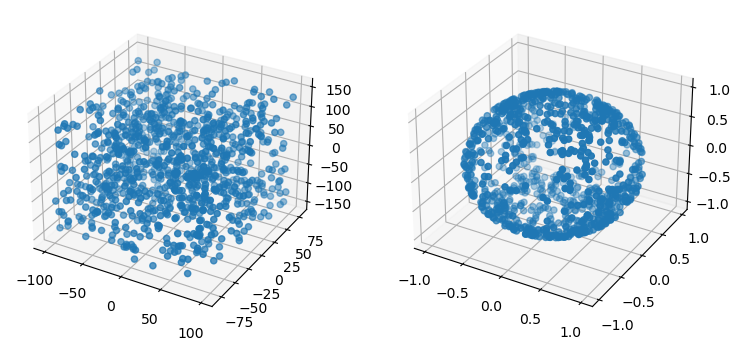

In [58]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

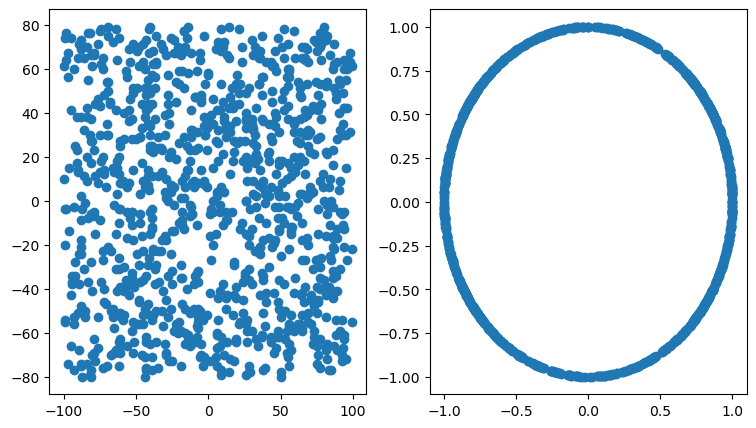

In [59]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float)
})

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df['x1'], df['y1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'])
plt.show()

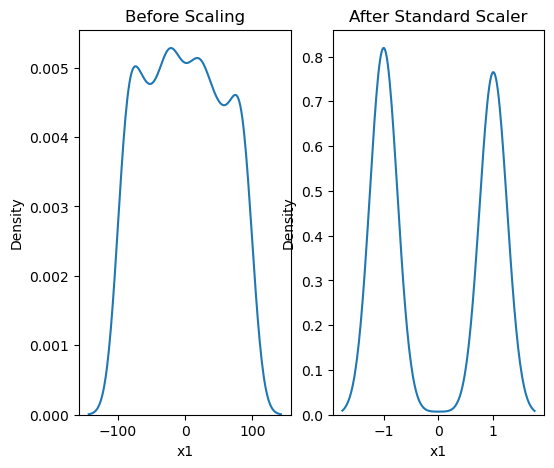

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import seaborn as sns
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
#     'y1': np.random.randint(-80, 80, 1000).astype(float)
})

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
# sns.kdeplot(df['x2'], ax=ax1)
# sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
# sns.kdeplot(scaled_df['x2'], ax=ax2)
# sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

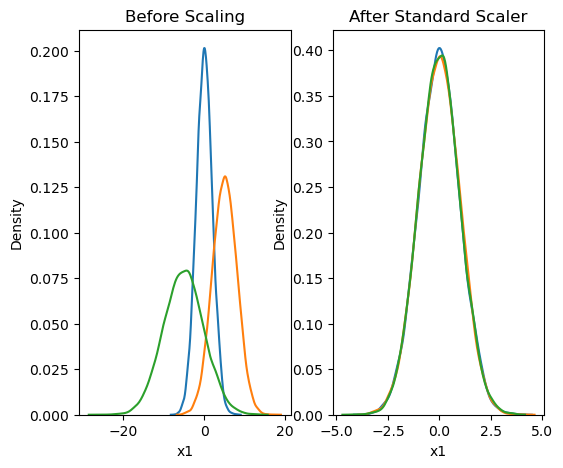

In [61]:
import seaborn as sns
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

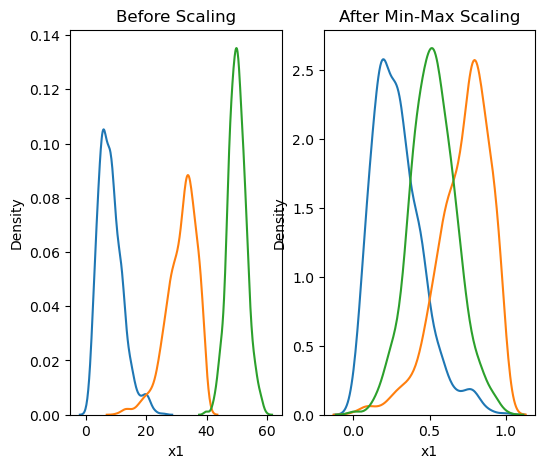

In [62]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

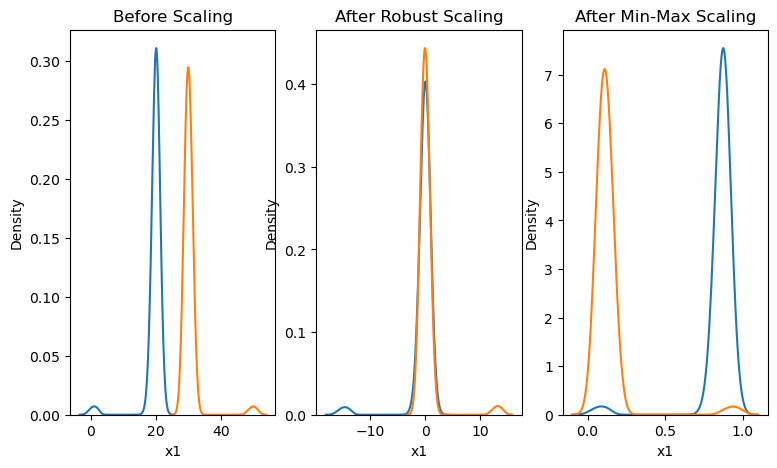

In [63]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

## Option 2: Fill Missing values with Scikit Learn

In [64]:
car_sales_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [65]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [67]:
len(car_sales_missing)

950

In [68]:
#Split into X and y

X = car_sales_missing.drop("Price", axis= 1)
y = car_sales_missing['Price']

In [69]:
#Divide data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [70]:
X_train.isna().sum()

Make             36
Colour           33
Odometer (KM)    36
Doors            39
dtype: int64

In [71]:
#Filling missing values with Scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical value with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

#Define Columns 
cat_features = ["Make", "Colour"]
door_features = ['Doors']
num_features = ["Odometer (KM)"]

#Create an imputer (Something tht fills missing data)

imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features), 
                           ("door_imputer", door_imputer, door_features), 
                           ("num_imputer",num_imputer,num_features)])

filled_X_train = imputer.fit_transform(X_train)
filled_X_train

array([['Honda', 'White', 4.0, 25729.0],
       ['missing', 'White', 4.0, 150826.0],
       ['Toyota', 'Green', 4.0, 214179.0],
       ...,
       ['Toyota', 'White', 4.0, 59222.0],
       ['Honda', 'missing', 4.0, 28625.0],
       ['Honda', 'White', 4.0, 130783.0]], dtype=object)

In [72]:
filled_X_test= imputer.fit_transform(X_test)
filled_X_test

array([['Honda', 'Black', 4.0, 147889.0],
       ['Toyota', 'Red', 4.0, 197616.0],
       ['Nissan', 'White', 4.0, 209259.0],
       ['Toyota', 'missing', 4.0, 204213.0],
       ['missing', 'Red', 4.0, 227262.0],
       ['Nissan', 'White', 4.0, 24741.0],
       ['Nissan', 'Green', 4.0, 32754.0],
       ['missing', 'White', 4.0, 138294.0],
       ['Nissan', 'White', 3.0, 137576.16853932585],
       ['Toyota', 'Blue', 4.0, 148421.0],
       ['BMW', 'White', 5.0, 227845.0],
       ['Toyota', 'Blue', 4.0, 220679.0],
       ['Honda', 'White', 4.0, 34822.0],
       ['Nissan', 'Blue', 4.0, 63686.0],
       ['Nissan', 'White', 4.0, 234161.0],
       ['Honda', 'White', 4.0, 178351.0],
       ['Toyota', 'Blue', 4.0, 98619.0],
       ['Toyota', 'Blue', 4.0, 215955.0],
       ['BMW', 'White', 5.0, 173915.0],
       ['Nissan', 'White', 4.0, 137576.16853932585],
       ['Honda', 'Blue', 4.0, 106494.0],
       ['Nissan', 'White', 4.0, 175777.0],
       ['Honda', 'Blue', 4.0, 50417.0],
       ['Toyota

In [73]:
X_train_filled= pd.DataFrame(filled_X_train,columns=["Make","Colour","Doors","Odometer (KM)"])
X_train_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,25729.0
1,missing,White,4.0,150826.0
2,Toyota,Green,4.0,214179.0
3,Honda,Red,4.0,11035.0
4,Honda,White,4.0,95481.0
...,...,...,...,...
755,Honda,Blue,4.0,234760.0
756,Honda,missing,4.0,213793.0
757,Toyota,White,4.0,59222.0
758,Honda,missing,4.0,28625.0


In [74]:
X_test_filled= pd.DataFrame(filled_X_test,columns=["Make","Colour","Doors","Odometer (KM)"])
X_test_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,Black,4.0,147889.0
1,Toyota,Red,4.0,197616.0
2,Nissan,White,4.0,209259.0
3,Toyota,missing,4.0,204213.0
4,missing,Red,4.0,227262.0
...,...,...,...,...
185,Nissan,Blue,4.0,137576.168539
186,Toyota,White,4.0,170085.0
187,Honda,missing,4.0,89291.0
188,BMW,Red,5.0,137576.168539


In [75]:
encoder=OneHotEncoder()
categorical_features=["Make","Colour","Doors"]
transformer = ColumnTransformer([('encoder',encoder,categorical_features)],remainder="passthrough")

X_train_encoded=pd.DataFrame(transformer.fit_transform(X_train_filled).todense())

In [76]:
encoder=OneHotEncoder()
categorical_features=["Make","Colour","Doors"]
transformer = ColumnTransformer([('encoder',encoder,categorical_features)],remainder="passthrough")

X_test_encoded=pd.DataFrame(transformer.fit_transform(X_test_filled).todense())

In [77]:
X_test_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,147889.000000
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,197616.000000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,209259.000000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,204213.000000
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,227262.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,137576.168539
186,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,170085.000000
187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,89291.000000
188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,137576.168539


In [78]:
X_train_encoded.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [79]:
#Let's fit a model 
np.random.seed(30)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_encoded,y_train)

RandomForestRegressor()

In [80]:
model.score(X_train_encoded,y_train)

0.8814090991486186

In [81]:
model.score(X_test_encoded,y_test)

0.3161930330956845

## 2. Choosing the right estimator/algorithm/model for your problem


![](ml_map.png)

#### 2.1 Picking a machine learning model from Regression problem


In [82]:
# let's use Californica Housing dataset of this demonstration 

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [83]:
housing_df= pd.DataFrame(housing.data, columns = housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [84]:
housing_df["Target"] = housing.target #MedHouseVal

In [85]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [86]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

### Ridge model

In [87]:
#Import algorithm 
from sklearn.linear_model import Ridge
#Setup random seed
np.random.seed(42)

#Create the data
X=housing_df.drop("Target",axis=1)
y=housing_df.Target

#Split in train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Fit and train the model 
model = Ridge()
model.fit(X_train,y_train)

# Check the score of model on (testset)
model.score(X_test,y_test) #Coefficient of Determination (R-squared) - measures the linear relationship between two variables


0.5758549611440126

### SVM - SVR(kernel="linear)

In [88]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#Setup random seed
np.random.seed(42)

#Create the data
X=housing_df.drop("Target",axis=1)
y=housing_df.Target

#Split in train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Fit and train the model 
model = make_pipeline(StandardScaler(),SVR(kernel="linear"))
model.fit(X_train,y_train)

# Check the score of model on (testset)
model.score(X_test,y_test) 

0.5579457285622507

## SVR(kernel='rbf')

In [89]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#Setup random seed
np.random.seed(42)

#Create the data
X=housing_df.drop("Target",axis=1)
y=housing_df.Target

#Split in train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Fit and train the model 
model = make_pipeline(StandardScaler(),SVR(kernel="rbf"))
model.fit(X_train,y_train)

# Check the score of model on (testset)
model.score(X_test,y_test) 

0.7275628923016779

### Emsemble model - RandomForestRegressor

In [90]:
#Import algorithm 
from sklearn.ensemble import RandomForestRegressor
#Setup random seed
np.random.seed(30)

#Create the data
X=housing_df.drop("Target",axis=1)
y=housing_df.Target

#Split in train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Fit and train the model 
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score of model on (testset)
model.score(X_test,y_test) #Coefficient of Determination (R-squared) - measures the linear relationship between two variables


0.8015671021014527

### 2.2 Picking machine learning model for classsification model 

In [91]:
from sklearn.datasets import load_breast_cancer
Breast_cancer=load_breast_cancer()
Breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [92]:
clf_dataset=pd.DataFrame(Breast_cancer.data,columns=Breast_cancer.feature_names)
clf_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [93]:
clf_dataset["Target"]=Breast_cancer.target
clf_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [94]:
from collections import Counter
Counter(clf_dataset.Target)

Counter({0: 212, 1: 357})

In [95]:
np.unique(clf_dataset.Target)

array([0, 1])

## LinearSVC

In [96]:
from sklearn.svm import LinearSVC

X=clf_dataset.drop("Target",axis=1)
y=clf_dataset.Target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=LinearSVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8947368421052632

## KNeighborsClassifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier

X=clf_dataset.drop("Target",axis=1)
y=clf_dataset.Target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9473684210526315

## SVC (kernel='linear', 'rbf', 'poly')

In [98]:
from sklearn.svm import SVC
X=clf_dataset.drop("Target",axis=1)
y=clf_dataset.Target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=SVC(kernel='linear')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9736842105263158

In [99]:
from sklearn.svm import SVC
X=clf_dataset.drop("Target",axis=1)
y=clf_dataset.Target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=SVC(kernel='rbf')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9736842105263158

In [100]:
from sklearn.svm import SVC
X=clf_dataset.drop("Target",axis=1)
y=clf_dataset.Target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=SVC(kernel='poly')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9122807017543859

## RandomForestClassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=clf_dataset.drop("Target",axis=1)
y=clf_dataset.Target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9649122807017544

## Let's do all this with custom data

In [102]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
heart_disease.shape

(303, 14)

In [104]:
len(heart_disease)

303

## LinearSVC again

In [105]:
from sklearn.svm import LinearSVC

X = heart_disease.drop('target',axis=1)
y = heart_disease.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = LinearSVC(max_iter=1000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4918032786885246

In [106]:
#not working LinearSVC lets try ensemble
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop('target',axis=1)
y = heart_disease.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

Tidbit: 
    
    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, used deep learning or neural networks

## Fitting a model / use to make predictions

### Fitting the model

In [107]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8524590163934426

###  3.2 Making Prediction using ml models

2 ways to do this 
1. `predict()`
2. `predict_proba()`

In [108]:
X_test.shape

(61, 13)

In [109]:
# use a trained model to make predict

model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [110]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [111]:
y_pred=model.predict(X_test)
np.mean(y_pred == y_test)

0.8524590163934426

In [112]:
model.score(X_test,y_test)

0.8524590163934426

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8524590163934426

In [114]:
# using predict_proba()
#predict_proba returns the probability of a classification label
model.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [115]:
model.predict(X_test[0:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [116]:
y_test[0:5]

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [117]:
heart_disease.target.value_counts() #use this instead of Counter

1    165
0    138
Name: target, dtype: int64

## prediction in regression model

In [118]:
#Import algorithm 
from sklearn.ensemble import RandomForestRegressor
#Setup random seed
np.random.seed(30)

#Create the data
X=housing_df.drop("Target",axis=1)
y=housing_df.Target

#Split in train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Fit and train the model 
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score of model on (testset)
model.score(X_test,y_test) #Coefficient of Determination (R-squared) - measures the linear relationship between two variables


0.8015671021014527

In [119]:
y_pred=model.predict(X_test)

In [120]:
y_pred[:10]

array([1.03616  , 2.5777701, 1.67115  , 3.9918717, 4.0229627, 4.3047911,
       1.97974  , 1.3858   , 1.74922  , 1.20362  ])

In [121]:
np.array(y_test[:10])

array([1.104  , 2.881  , 1.397  , 5.00001, 4.389  , 4.316  , 2.138  ,
       1.495  , 1.775  , 0.906  ])

In [122]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.33873078614341107

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
   1. Estimator's Built-in `score()` method
   2. The `scoring()` parameter
   3. Problem-specific metric functions

## 4.1 Evaluating a model with `score()` method

In [123]:
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [124]:
clf.score(X_train,y_train) #mean accuracy in classification

1.0

In [125]:
clf.score(X_test,y_test)

0.8524590163934426

Let's use the `score` method on our regression problem

In [126]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("Target",axis=1)
y=housing_df.Target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [127]:
model.score(X_train,y_train) #by default if give R^2 score

0.9736801960414609

In [128]:
model.score(X_test,y_test)

0.8065734772187598

### 4.2 Evaluating model using the Scoring parameters

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf= RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [130]:
clf.score(X_test,y_test)

0.8524590163934426

In [131]:
cross_val_score(clf,X,y,cv=10) # default value of CV is 5

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [132]:
np.random.seed(42);

clf_single_score=clf.score(X_test,y_test)

#Take mean of 5 crossvalScore
clf_cross_val_score= np.mean(cross_val_score(clf,X,y,cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [133]:
#Scoring parameter set of none by default

cross_val_score(clf,X,y,cv=5,scoring=None) # Scoring parameter is none it uses the default scoring paramete same as score() methods is using means in case of classification it is accuracy and in case of regression it is r_squared score

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

Cross-validation aims to solve the problem of not training on the data and avoiding getting lucky scores. 

### 4.2.1 Classification model evaluating metrics 

1. Accuracy
2. Area under the curve
3. Confusion matrix
4. Classification report

In [134]:
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease=pd.read_csv("heart-disease.csv")
X,y=heart_disease.drop("target",axis=1),heart_disease.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [135]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [136]:
accuracy_score(y,cross_val_predict(clf,X,y))

0.8184818481848185

In [137]:
cross_val_predict(clf,X,y)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [138]:
cross_validate(clf,X,y)

{'fit_time': array([0.14223862, 0.12763929, 0.12061858, 0.12412572, 0.12065101]),
 'score_time': array([0.00799799, 0.00899553, 0.00900173, 0.00799942, 0.00899982]),
 'test_score': array([0.85245902, 0.8852459 , 0.81967213, 0.8       , 0.78333333])}

In [139]:
print(f"Heart Disease Classifier cross-validated Accuracy: {np.mean(cross_val_score(clf,X,y))*100:.2f}%")

Heart Disease Classifier cross-validated Accuracy: 81.84%


**Area under the receiver operating characteristic curve** 

* Area under the Curve(AUC)
* ROC curve 

ROC curve are a comparision of a model's true positive rate (TPR) versus a model's false positive rate(FTR) 

* True positive = Model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0 
* False negative = model predicts 0 when truth is 1

In [140]:
from sklearn.metrics import roc_curve

#Make predictions with probability 
y_probs = clf.predict_proba(X_test)

y_probs

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [141]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [142]:
#Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive) #return fpr, tpr, and Thresholds


In [143]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [144]:
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

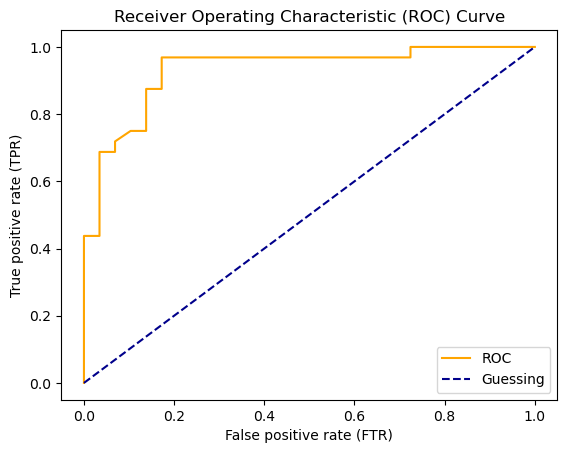

In [145]:
# Create a function for plotting roc Curve 
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve give the FPR, TPR of a model
    """
    #plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    #plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    
    plt.xlabel("False positive rate (FTR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr,tpr)

In [146]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9304956896551724

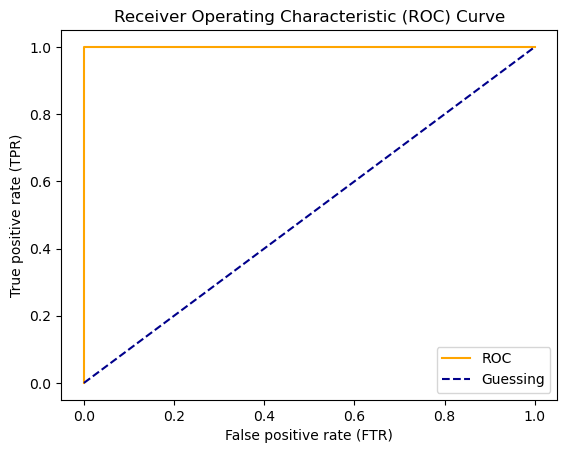

In [147]:
#plot perfect roc curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [148]:
roc_auc_score(y_test,y_test)

1.0

Let's try Area under the reciever operative Curve on `breast cancer dataset`  

In [149]:
def roc_curve_plot(fpr,tpr):
    plt.plot(fpr,tpr, color="red",label="ROC")
    plt.plot([0,1],[0,1], color="m", linestyle="--", label="Guessing")
    
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

The Accuracy Score of model is: 96.49%
The AUC score of the model is: 98.67%


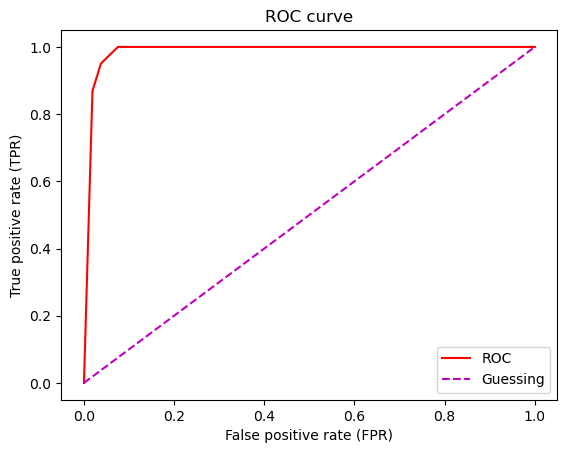

In [150]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve

Breast_cancer=load_breast_cancer()
breast_cancer_dataset= pd.DataFrame(Breast_cancer.data,columns=Breast_cancer.feature_names)
breast_cancer_dataset["target"] = Breast_cancer.target

#Features and labels
X = breast_cancer_dataset.drop('target',axis=1)
y = breast_cancer_dataset.target

#Spliting Training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instanciating the model 
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)
print(f"The Accuracy Score of model is: {clf.score(X_test,y_test)*100:.2f}%")
y_probs=clf.predict_proba(X_test)

y_true_probs = y_probs[:,1]

#Creating Roc curve 

fpr, tpr, thresholds = roc_curve(y_test,y_true_probs)

print(f"The AUC score of the model is: {roc_auc_score(y_test,y_true_probs)*100:.2f}%")
roc_curve_plot(fpr,tpr)


In [151]:
breast_cancer_dataset.target.value_counts()

1    357
0    212
Name: target, dtype: int64

**Confusion Matrix**

A Confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you an idea of where the model is getting confused

In [152]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

matrix=confusion_matrix(y_test,y_preds)

In [153]:
matrix

array([[49,  4],
       [ 0, 61]], dtype=int64)

In [154]:
#Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,49,4
1,0,61


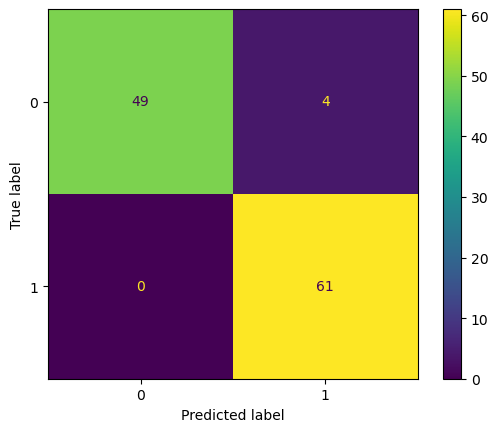

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay

disp=ConfusionMatrixDisplay(matrix,display_labels=[0,1])
disp.plot();

#### How install a conda package into the current environment from the Jupyter notebook 
`import sys`

`!conda install --yes --prefix {sys.prefix} seaborn`

<Axes: >

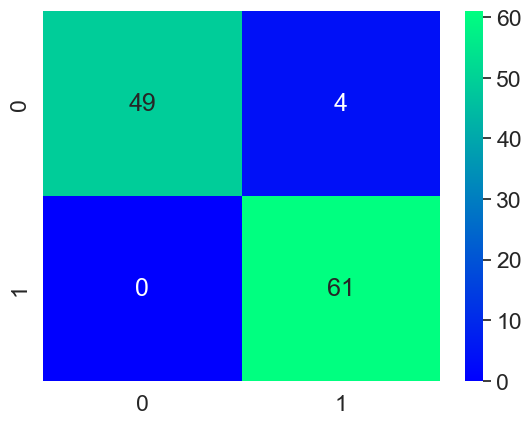

In [156]:
#Make our confusion matrix more visual with seaborn heatmap

import seaborn as sns
#set the font scale
sns.set(font_scale=1.5)

conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat,annot=True,cmap='winter')

#### Creating a confusion matrix using Scikit-learn

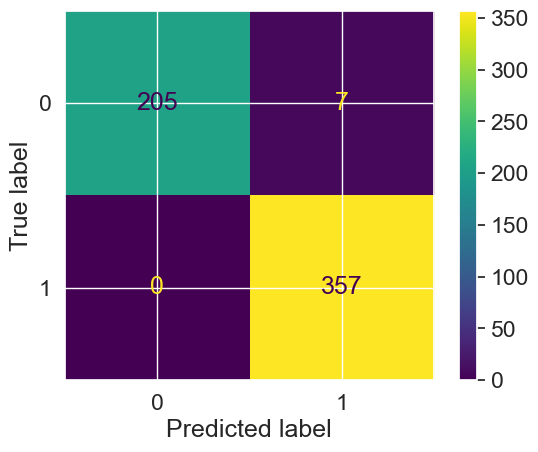

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y);

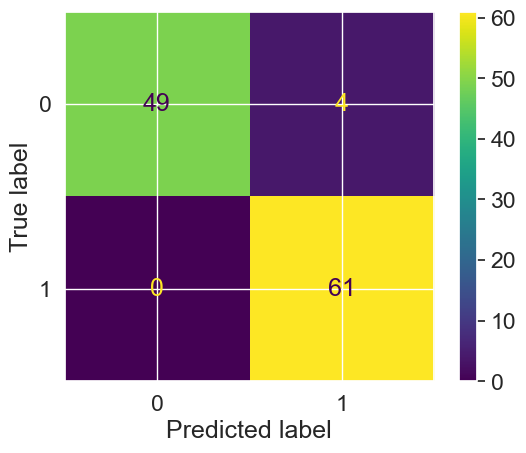

In [158]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

### Classification report

In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        53
           1       0.94      1.00      0.97        61

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [160]:
pd.DataFrame(classification_report(y_test,y_preds,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.938462,0.964912,0.969231,0.967072
recall,0.924528,1.000000,0.964912,0.962264,0.964912
f1-score,0.960784,0.968254,0.964912,0.964519,0.964781
support,53.000000,61.000000,0.964912,114.000000,114.000000


### 4.2.2 Regression model Evaluation metrics

1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error(MAE)
3. Mean squared error(MSE)

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing();
housing_df= pd.DataFrame(dataset.data, columns=dataset.feature_names)
housing_df["target"]=dataset.target

np.random.seed(42); 

X=housing_df.drop("target",axis=1)
y=housing_df.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2);

model = RandomForestRegressor()
model.fit(X_train,y_train)



RandomForestRegressor()

In [162]:
model.score(X_test,y_test)

0.8065734772187598

In [163]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [164]:
y_test.mean() #if model predict this for all of the cases then model would get the R2 score of 0.00

2.0550030959302323

In [165]:
from sklearn.metrics import r2_score

y_pred=model.predict(X_test)

r2_score(y_test,y_pred)

0.8065734772187598

In [166]:
y_test_mean = np.full(len(y_test), y_test.mean())

In [167]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [168]:
r2_score(y_test,y_test_mean)

0.0

In [169]:
r2_score(y_test,y_test)

1.0

**Mean Absolute Error**

MAE is the average of teh absolute difference between predictions and actual values 

it gives you an ideas of how wrong your models predictions are. 

In [170]:
from sklearn.metrics import mean_absolute_error

mae= mean_absolute_error(y_test,y_pred)
mae

0.32659871732073664

In [171]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mse

0.2534678520824551

In [172]:
df = pd.DataFrame(data={'actual values':y_test,
                       "predicted values":y_pred})

df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [173]:
np.abs(df['differences']).mean()

0.32659871732073664

In [174]:
np.square(df['differences']).mean() # mean squared error

0.2534678520824551

In [175]:
df["squared_differences"] = np.square(df["differences"])

In [176]:
df

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [177]:
mse = np.mean(df['squared_differences'])
mse

0.2534678520824551

**Root mean squared error(RMSE)**

In [178]:
np.sqrt(mse)

0.5034559087769803

## 4.2.3 A model with Cross validation and Scoring Parameter

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease = pd.read_csv("heart-disease.csv")

X = heart_disease.drop('target',axis=1)
y = heart_disease.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2);

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

RandomForestClassifier()

In [180]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y, cv=5, scoring=None) # cv = 5 means 5 k-folds
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [181]:
print(f"the corss validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

the corss validated accuracy is : 82.48%


In [182]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y, cv=5, scoring='accuracy') # cv = 5 means 5 k-folds
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [183]:
print(f"the corss validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

the corss validated accuracy is : 82.48%


In [184]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y, cv=5, scoring='precision') # cv = 5 means 5 k-folds
cv_acc

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [185]:
print(f"the corss validated precision is : {np.mean(cv_acc)*100:.2f}%")

the corss validated precision is : 83.30%


In [186]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y, cv=5, scoring='recall') # cv = 5 means 5 k-folds
cv_acc

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [187]:
print(f"the corss validated Recall is : {np.mean(cv_acc)*100:.2f}%")

the corss validated Recall is : 85.45%


In [188]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y, cv=5, scoring='f1') # cv = 5 means 5 k-folds
cv_acc

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [189]:
print(f"the corss validated f1 score is : {np.mean(cv_acc)*100:.2f}%")

the corss validated f1 score is : 84.27%


Let's see the Scoring parameter being used for regression problem

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing();
housing_df= pd.DataFrame(dataset.data, columns=dataset.feature_names)
housing_df["target"]=dataset.target

np.random.seed(42); 

X=housing_df.drop("target",axis=1)
y=housing_df.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2);

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [191]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X,y , cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [192]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X,y , cv=3,scoring='neg_mean_absolute_error') #generally in error lower is better but with negative mse or negative mae higher is better since it is negative 
np.mean(cv_r2)

-0.4835773816036823

In [193]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [194]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X,y , cv=3,scoring='neg_mean_squared_error')
np.mean(cv_r2)


-0.46141356443710196

### 4.3 using different evluation metrics as Scikit-learn functions

The 3rd way to evaluate scikit-learn machine learning model /estimator is to use the `sklearn.metrics` module

In [195]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Classifier metrics on the test set")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("f1 Score: ",f1_score(y_test,y_pred))
print("recal score: ", recall_score(y_test,y_pred))

Classifier metrics on the test set
Accuracy:  0.8524590163934426
Precision:  0.8484848484848485
f1 Score:  0.8615384615384615
recal score:  0.875


In [196]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X= housing_df.drop("target",axis=1)
y= housing_df.target

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Regression metricss on the test set")
print("R2 score: ",r2_score(y_test,y_pred))
print('MSE: ', mean_squared_error(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))


Regression metricss on the test set
R2 score:  0.8065734772187598
MSE:  0.2534678520824551
MAE:  0.32659871732073664


## Improving the ML Model

first predictions = baseline predictions. 
first model = baseline model 

for a data perspective: 
1. Could we collect more data? (generally, the more data, the better)
2. Could we imporove our data? 

From a model perspective:
1. Is there a better model that we could use?
2. Could we improve the current model? - Hyperparameter tuning

**Parameters** = model find these patterns in data

**Hyperparameters** = setting on a model you can adjust to (potentially) improve its ability to find patterns

In [197]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Three ways to adjust the hyperparameters

1. By Hand
2. Randomly with RandomSearchCV
2. Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test. 


In [198]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're goint to try and adjust: 

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [246]:
def evaluate_preds_classification(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true,y_pred)
    metric_dict = {"Accuracy":round(accuracy,2), 
                   "precision":round(precision,2), 
                   "Recall":round(recall,2), 
                    "f1": round(f1,2)}
    print(f"Acc: {accuracy* 100:.2f}%")
    print(f"Precision: {precision* 100:.2f}%")
    print(f"Recall: {recall* 100:.2f}%")
    print(f"F1 score: {f1* 100:.2f}%")
    return metric_dict

In [247]:
#Split the data in train , test, validation

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

X= heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled.target

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
# print(train_split, valid_split, len(heart_disease_shuffled))
X_train,y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_valid)

baseline_metrics = evaluate_preds_classification(y_valid,y_pred)

Acc: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 score: 84.62%


In [248]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train,y_train)

y_pred= clf_2.predict(X_valid)

clf2_metrics = evaluate_preds_classification(y_valid, y_pred)

Acc: 82.22%
Precision: 84.00%
Recall: 84.00%
F1 score: 84.00%


In [249]:
clf_3 = RandomForestClassifier(n_estimators=100, 
                              max_depth= 100)

clf_3.fit(X_train,y_train)
y_pred = clf_3.predict(X_valid)

clf3_metrics = evaluate_preds_classification(y_valid,y_pred)

Acc: 80.00%
Precision: 83.33%
Recall: 80.00%
F1 score: 81.63%


This is very exhaustive so sklearn has a method build-in for in it 
`RandomizedSearchCV`

In [250]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200], 
        "max_depth":[None , 5, 10, 20, 30], 
        "max_features": ["auto", "sqrt"], 
        "min_samples_split":[2,4,6], 
        "min_samples_split":[1,2,4]}

np.random.seed(42)

X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled.target

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid, 
                           n_iter=10, #No. of model you want to try on 
                           cv = 5, #no.of k folds
                           verbose=2)# to see score and time in output display

#fit the RandomizedSearchCV version of clf

rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_feature

C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, ex

[CV] END max_depth=30, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.6s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.6s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.6s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.6s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_split=2, n_estimators=500; total time=   0.6s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=4, n_estimators=500; total time=   0.6s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=4, n_estimators=500; total time=   0.6s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=4, n_estimators=500; total time=   0.6s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=4, n_estimators=500; total time=   0.6s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=1, n_estimators=1200; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s

C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklea

In [251]:
rs_clf.best_params_ #When we predict by default it will use this parameters

{'n_estimators': 500,
 'min_samples_split': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [252]:
rs_y_pred = rs_clf.predict(X_test)

rs_metrcs = evaluate_preds_classification(y_test,rs_y_pred)

Acc: 81.97%
Precision: 75.76%
Recall: 89.29%
F1 score: 81.97%


### 5.3 Hyperparameter tuning with GridSearchCV

In [253]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [1, 2, 4]}

In [254]:
grid_2 = {'n_estimators': [10, 100, 200, 500],
         'max_depth': [10, 20, 30],
         'max_features': ['sqrt'],
         'min_samples_split': [2, 4]}

In [255]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled.target

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf, 
                           param_grid=grid_2,
                           cv = 5, #no.of k folds
                           verbose=2)# to see score and time in output display

#fit the RandomizedSearchCV version of clf

gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, m

[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=500; total time=   0.6s


In [256]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 100}

In [257]:
gs_preds= gs_clf.predict(X_test)
gs_metrics = evaluate_preds_classification(y_test,gs_preds)

Acc: 81.97%
Precision: 75.76%
Recall: 89.29%
F1 score: 81.97%


let's compare our different model matrixs`

In [258]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics, 
                               "clf_2":clf2_metrics,
                              'randomized search':rs_metrcs,
                              'grid search':gs_metrics})

compare_metrics

,baseline,clf_2,randomized search,grid search
Accuracy,0.82,0.82,0.82,0.82
precision,0.81,0.84,0.76,0.76
Recall,0.88,0.84,0.89,0.89
f1,0.85,0.84,0.82,0.82


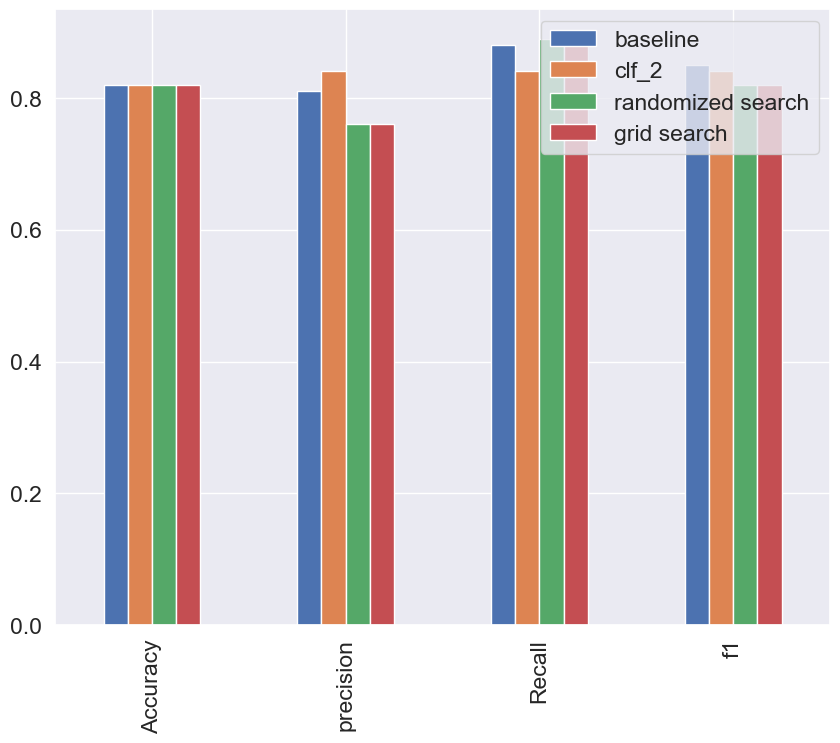

In [262]:
compare_metrics.plot.bar(figsize=(10,8));

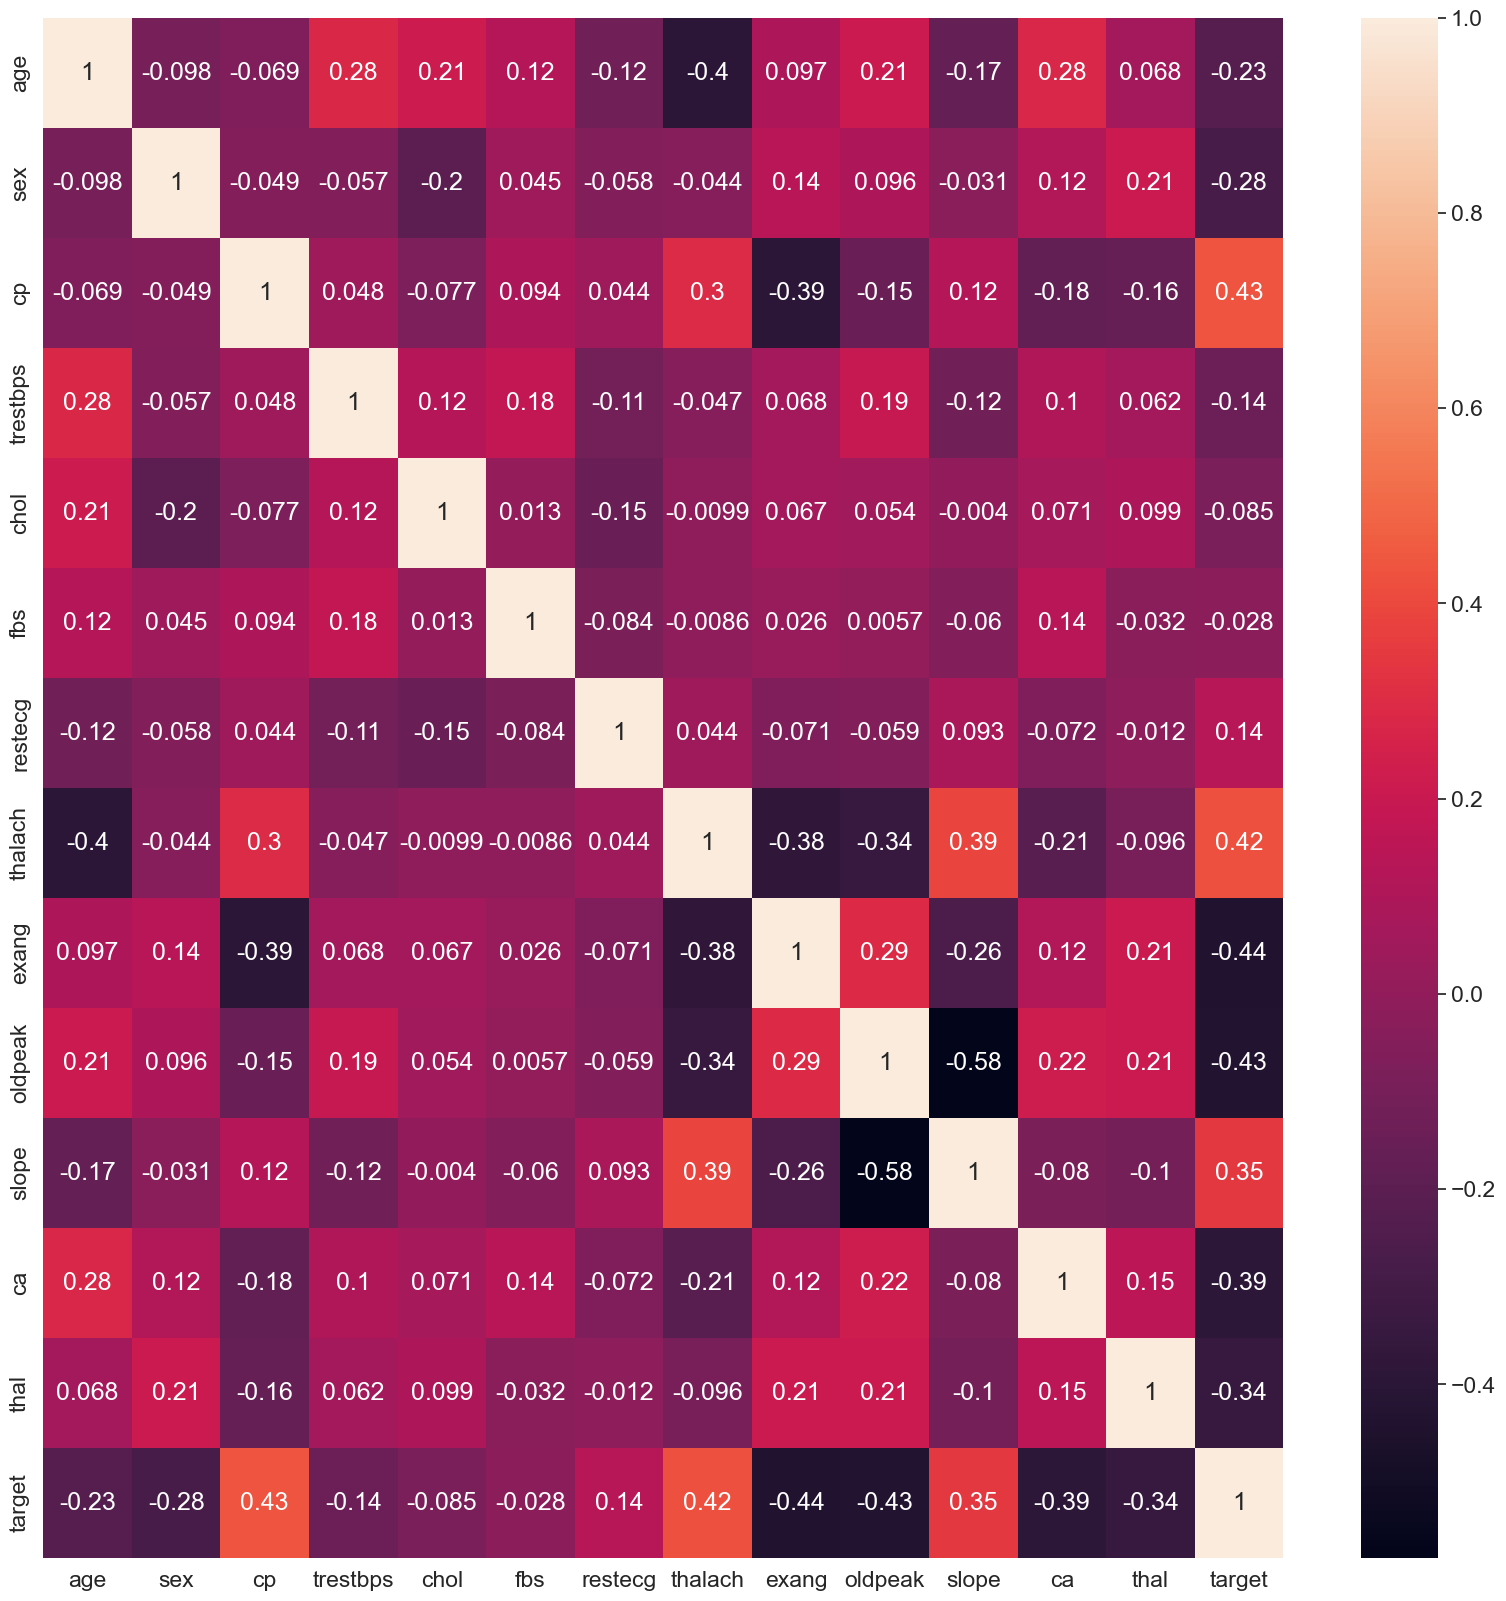

In [276]:
plt.figure(figsize=(20,20))
sns.heatmap(heart_disease.corr(),annot=True);

## Save and Share and load a model

## 6. Saving and Sharing trained Machine learning model

two way we can do this
1. with python's `pickle` module
2. with the `joblib` module

**Pickle**

In [280]:
import pickle

#save and exicting model file

pickle.dump(gs_clf, open('scikit-learn-models/gs_random_forest_model_1.pkl','wb'))

In [281]:
# Load a saved model 
loaded_pickle_model = pickle.load(open('scikit-learn-models/gs_random_forest_model_1.pkl','rb'))


In [282]:
loaded_pickle_model.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [284]:
np.array(y_test)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [285]:
evaluate_preds_classification(y_test,loaded_pickle_model.predict(X_test))

Acc: 81.97%
Precision: 75.76%
Recall: 89.29%
F1 score: 81.97%


{'Accuracy': 0.82, 'precision': 0.76, 'Recall': 0.89, 'f1': 0.82}

**joblib**

In [286]:
from joblib import dump,load

dump(gs_clf, filename='scikit-learn-models/gs_random_forest_model_2.joblib')

['scikit-learn-models/gs_random_forest_model_2.joblib']

In [287]:
loaded_joblib_model = load(filename="scikit-learn-models/gs_random_forest_model_2.joblib")

In [288]:
evaluate_preds_classification(y_test,loaded_joblib_model.predict(X_test))

Acc: 81.97%
Precision: 75.76%
Recall: 89.29%
F1 score: 81.97%


{'Accuracy': 0.82, 'precision': 0.76, 'Recall': 0.89, 'f1': 0.82}

## Putting it All together

In [289]:
data = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [290]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [291]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# sklearn.pipeline.Pipeline

Steps we want to do all in one cell
1. Fill missing data
2. covert data to numbers 
3. Build a model on the data

In [293]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

import numpy as np
np.random.seed(42)

data = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'], inplace = True)

# Define different features in Transformers pipeline

categorical_features = ['Make',"Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant",fill_value=4))
])

numerical_features = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

# Setup the preprocessing steps (fill missing values , then convert to numbers) 
preprocessor = ColumnTransformer(transformers=[
                                ('cat',categorical_transformer,categorical_features),
                                ('door',door_transformer,door_feature),
                                ('num',numerical_transformer,numerical_features)
])

# Creating a prerocessing and modelling pipeline
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
])

X = data.drop('Price',axis=1)
y = data.Price
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

In [295]:
# Use GridSearchCV with our regression pipeline
pipe_grid={
    'preprocessor__num__imputer__strategy':['mean','median'], 
    'model__n_estimators':[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":['auto'],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.3s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.3s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.3s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.9s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.9s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.3s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.3s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s


C:\Code Playground\MachineLearningZTM\sample_project\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [296]:
gs_model.score(X_test,y_test)

0.3339554263158365